This is the Life Expectancy and GDP project from Codecademy's Data Analyst Career Path.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency
import seaborn as sns
data = pd.read_csv('all_data.csv')
print(data.head(10))

  Country  Year  Expectancy           GDP
0   Chile  2000        77.3  7.786093e+10
1   Chile  2001        77.3  7.097992e+10
2   Chile  2002        77.8  6.973681e+10
3   Chile  2003        77.9  7.564346e+10
4   Chile  2004        78.0  9.921039e+10
5   Chile  2005        78.4  1.229650e+11
6   Chile  2006        78.9  1.547880e+11
7   Chile  2007        78.9  1.736060e+11
8   Chile  2008        79.6  1.796380e+11
9   Chile  2009        79.3  1.723890e+11


In [98]:
#Get some information about the data
num_years = data.Year.nunique()
print('The number of unique years in the dataset is ' + str(num_years) + '.')
num_countries = data.Country.nunique()
print('There are ' + str(num_countries) + ' countries in the dataset.')
print('There are ' + str(len(data)) + ' items in the dataset.')

The number of unique years in the dataset is 16.
There are 6 countries in the dataset.
There are 96 items in the dataset.


In [99]:
#Rename 'Life expectancy at birth ( years)' for ease of use
data.rename(columns={'Life expectancy at birth (years)': 'Expectancy'}, inplace=True)
print(data.head())

  Country  Year  Expectancy           GDP
0   Chile  2000        77.3  7.786093e+10
1   Chile  2001        77.3  7.097992e+10
2   Chile  2002        77.8  6.973681e+10
3   Chile  2003        77.9  7.564346e+10
4   Chile  2004        78.0  9.921039e+10


In [100]:
# Now I want to check the mean and median of the expectancy and GDP columns
expect_mean = round(np.mean(data.Expectancy), 1)
print('The mean life expectancy is ' + str(expect_mean) + '.')
gdp_mean = round(np.mean(data.GDP), 0)
print('The mean GDP is ' + str(gdp_mean) + '.')


The mean life expectancy is 72.8.
The mean GDP is 3880498570768.0.


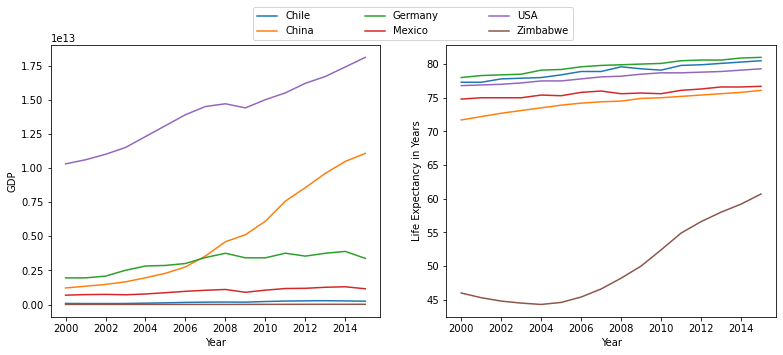

In [101]:
# Let's look at the GDP and life expectancy changes across the years, side by side
fig = plt.figure(figsize = (13,5))
axs = plt.subplot(1,2,1)
gdp_plot = sns.lineplot(data=data, x="Year", y="GDP", hue="Country", legend=False)

plt.subplot(1,2,2)
life_plot = sns.lineplot(data=data, x="Year", y="Expectancy", hue="Country",legend=False)

plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years')
labels = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']

plt.legend(labels=labels, bbox_to_anchor=(-0.6, 1, 1, 0.5), loc='lower left',
           ncol=3, mode="expand") 
plt.show()

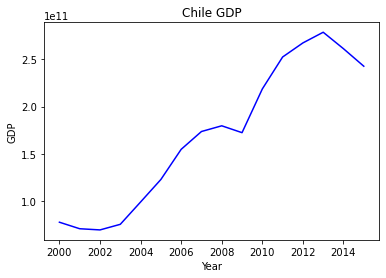

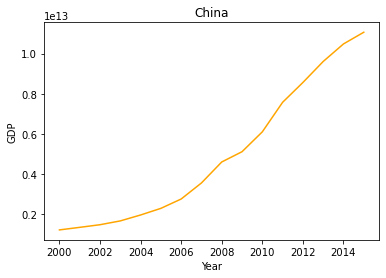

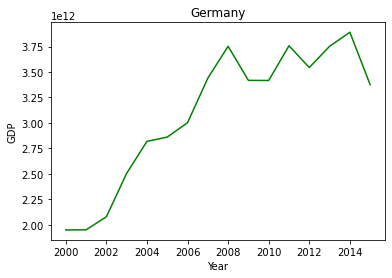

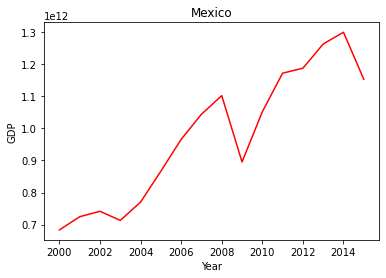

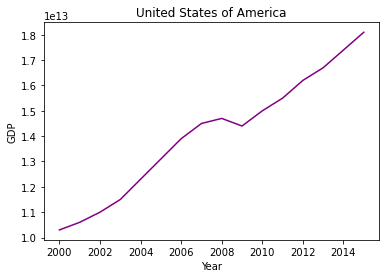

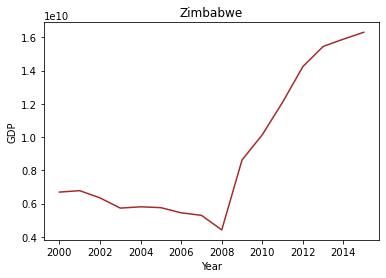

<Figure size 432x288 with 0 Axes>

In [102]:
# GDP increased for China, Germany, and USA but stayed fairly flat for Chile, Mexico, and Zimbabwe. Life expectancy
# rose significantly in Zimbabwe but only slightly in the other five countries. Zimbabwe started out with a much
# shorter life expectancy, though, and did not catch up with the other countries.
# It would be useful to get the mean GDP and life expectancy for each country and maybe to plot the GDP and life
# expectancy for each country against each other.

chile = sns.lineplot(data=data[data.Country == 'Chile'], x='Year', y='GDP', color='blue')
chile.set_title('Chile GDP')
plt.show()
plt.clf()
china = sns.lineplot(data=data[data.Country == 'China'], x='Year', y='GDP', color='orange')
china.set_title('China')
plt.show()
plt.clf()
germany = sns.lineplot(data=data[data.Country == 'Germany'], x='Year', y='GDP', color='green')
germany.set_title('Germany')
plt.show()
plt.clf()
mexico = sns.lineplot(data=data[data.Country == 'Mexico'], x='Year', y='GDP', color='red')
mexico.set_title('Mexico')
plt.show()
plt.clf()
usa = sns.lineplot(data=data[data.Country == 'United States of America'], x='Year', y='GDP', color='purple')
usa.set_title('United States of America')
plt.show()
plt.clf()
zimbabwe = sns.lineplot(data=data[data.Country == 'Zimbabwe'], x='Year', y='GDP', color='brown')
zimbabwe.set_title('Zimbabwe')
plt.show()
plt.clf()


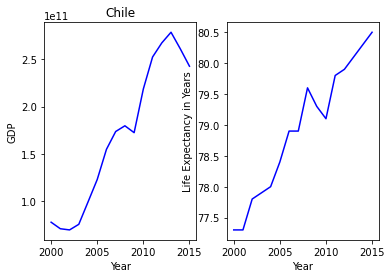

In [78]:
axchile1 = plt.subplot(1,2,1)
chilegdp_plot = sns.lineplot(data=data[data.Country == 'Chile'], x='Year', y='GDP', color='blue', legend=False)

plt.subplot(1,2,2)
chilelife_plot = sns.lineplot(data=data[data.Country == 'Chile'], x='Year', y='Expectancy', color='blue',legend=False)

plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years')

axchile1.set_title('Chile')
plt.show()

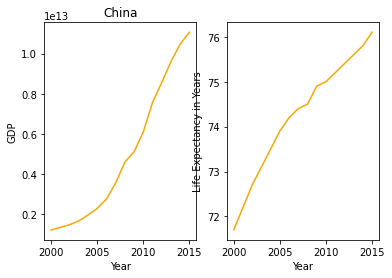

In [80]:
axchina1 = plt.subplot(1,2,1)
chinagdp_plot = sns.lineplot(data=data[data.Country == 'China'], x='Year', y='GDP', color='orange', legend=False)

plt.subplot(1,2,2)
chinalife_plot = sns.lineplot(data=data[data.Country == 'China'], x='Year', y='Expectancy', color='orange',legend=False)

plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years')
axchina1.set_title('China')
plt.show()

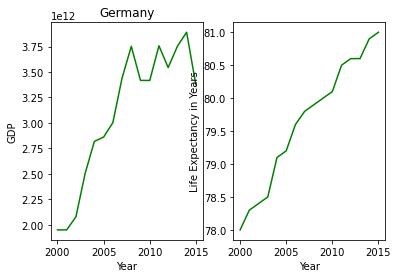

In [81]:
axgermany1 = plt.subplot(1,2,1)
germanygdp_plot = sns.lineplot(data=data[data.Country == 'Germany'], x='Year', y='GDP', color='green', legend=False)

plt.subplot(1,2,2)
germanylife_plot = sns.lineplot(data=data[data.Country == 'Germany'], x='Year', y='Expectancy', color='green',legend=False)

plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years')
axgermany1.set_title('Germany')
plt.show()


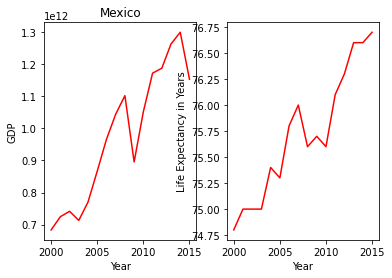

In [82]:
axmexico1 = plt.subplot(1,2,1)
mexicogdp_plot = sns.lineplot(data=data[data.Country == 'Mexico'], x='Year', y='GDP', color='red', legend=False)

plt.subplot(1,2,2)
mexicolife_plot = sns.lineplot(data=data[data.Country == 'Mexico'], x='Year', y='Expectancy', color='red',legend=False)

plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years')
axmexico1.set_title('Mexico')
plt.show()

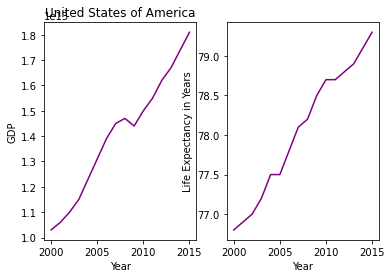

In [83]:
axusa1 = plt.subplot(1,2,1)
usagdp_plot = sns.lineplot(data=data[data.Country == 'United States of America'], x='Year', y='GDP', color='purple', legend=False)

plt.subplot(1,2,2)
usalife_plot = sns.lineplot(data=data[data.Country == 'United States of America'], x='Year', y='Expectancy', color='purple',legend=False)

plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years')
axusa1.set_title('United States of America')
plt.show()

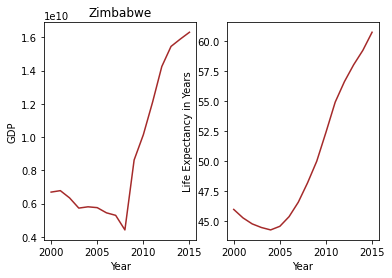

In [84]:
axzimbabwe1 = plt.subplot(1,2,1)
zimbabwegdp_plot = sns.lineplot(data=data[data.Country == 'Zimbabwe'], x='Year', y='GDP', color='brown', legend=False)

plt.subplot(1,2,2)
zimbabwelife_plot = sns.lineplot(data=data[data.Country == 'Zimbabwe'], x='Year', y='Expectancy', color='brown',legend=False)

plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years')
axzimbabwe1.set_title('Zimbabwe')
plt.show()

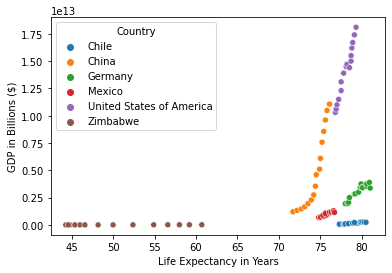

In [86]:
#Now lets look at all of the countries together again.
sns.scatterplot(data=data, x='Expectancy', y='GDP', hue='Country')
plt.xlabel('Life Expectancy in Years')
plt.ylabel('GDP in Billions ($)')
plt.show()

In [87]:
# Life expectancy and GDP have actually increased in all six nations. There does seem to be a correlation between
# the two measures in each country. 
# As of 2015, life expectancies are:
# 80.5 in Chile
# 76.1 in China
# 81 in Germany
# 76.7 in Mexico
# 79.3 in the USA
# 60.7 in Zimbabwe

In [108]:
#Is there a correlation between GDP and Life Expectancy?
chile_corr = pearsonr(data.GDP[data.Country == 'Chile'], data.Expectancy[data.Country == 'Chile'])
print('The correlation for Chile is ' + str(chile_corr[0]) + ', indicating a strong positive correlation.')

The correlation for Chile is 0.9498766659254416, indicating a strong positive correlation.


In [113]:
# Let's do the other countries
china_corr = pearsonr(data.GDP[data.Country == 'China'], data.Expectancy[data.Country == 'China'])
print('The correlation for China is ' + str(china_corr[0]) + ', indicating a strong positive correlation.')
germany_corr = pearsonr(data.GDP[data.Country == 'Germany'], data.Expectancy[data.Country == 'Germany'])
print('The correlation for Germany is ' + str(germany_corr[0]) + ', indicating a strong positive correlation.')
mexico_corr = pearsonr(data.GDP[data.Country == 'Mexico'], data.Expectancy[data.Country == 'Mexico'])
print('The correlation for Mexico is ' + str(mexico_corr[0]) + ', indicating a strong positive correlation.')
usa_corr = pearsonr(data.GDP[data.Country == 'United States of America'], data.Expectancy[data.Country == 'United States of America'])
print('The correlation for USA is ' + str(usa_corr[0]) + ', indicating a strong positive correlation.')
zimbabwe_corr = pearsonr(data.GDP[data.Country == 'Zimbabwe'], data.Expectancy[data.Country == 'Zimbabwe'])
print('The correlation for Zimbabwe is ' + str(zimbabwe_corr[0]) + ', indicating a strong positive correlation.')


The correlation for China is 0.9085255408648358, indicating a strong positive correlation.
The correlation for Germany is 0.9326988982561268, indicating a strong positive correlation.
The correlation for Mexico is 0.9322377167847081, indicating a strong positive correlation.
The correlation for USA is 0.9817092382430257, indicating a strong positive correlation.
The correlation for Zimbabwe is 0.9661998955858777, indicating a strong positive correlation.


In [123]:
#What is the average life expectancy for each country?
chile_avg_expect = np.mean(data.Expectancy[data.Country == 'Chile'])
print('The average life expectancy in Chile is ' + str(chile_avg_expect) + '.')
china_avg_expect = np.mean(data.Expectancy[data.Country == 'China'])
print('The average life expectancy in China is ' + str(china_avg_expect) + '.')
germany_avg_expect = np.mean(data.Expectancy[data.Country == 'Germany'])
print('The average life expectancy in Germany is ' + str(germany_avg_expect) + '.')
mexico_avg_expect = np.mean(data.Expectancy[data.Country == 'Mexico'])
print('The average life expectancy in Mexico is ' + str(mexico_avg_expect) + '.')
usa_avg_expect = np.mean(data.Expectancy[data.Country == 'United States of America'])
print('The average life expectancy in the USA is ' + str(usa_avg_expect) + '.')
zimbabwe_avg_expect = np.mean(data.Expectancy[data.Country == 'Zimbabwe'])
print('The average life expectancy in Zimbabwe is ' + str(zimbabwe_avg_expect) + '.')

The average life expectancy in Chile is 78.94374999999998.
The average life expectancy in China is 74.26249999999999.
The average life expectancy in Germany is 79.65625.
The average life expectancy in Mexico is 75.71875.
The average life expectancy in the USA is 78.0625.
The average life expectancy in Zimbabwe is 50.09375000000001.


All in all, we found that there is a strong positive correlation between GDP and life expectancy in each of the six example countries, and there was an overall upward trend for both statistics in each of these six countries between 2000 and 2015.